In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

In [2]:
train_data = pd.read_csv('train_data.txt', sep=':::', header=None, names=['SerialNumber', 'MOVIE_NAME', 'GENRE', 'MOVIE_PLOT'], engine='python')

In [3]:
train_data.head()

,SerialNumber,MOVIE_NAME,GENRE,MOVIE_PLOT
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SerialNumber  54214 non-null  int64 
 1   MOVIE_NAME    54214 non-null  object
 2   GENRE         54214 non-null  object
 3   MOVIE_PLOT    54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [5]:
genre_list = ['action', 'adult', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 'family']

In [6]:
x_train = train_data['MOVIE_PLOT'].astype(str).apply(lambda doc: doc.lower())
genre_labels = [genre.split(', ') for genre in train_data['GENRE']]
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(genre_labels)

In [7]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [8]:
with tqdm(total=50, desc="Vectorizing Training Data") as pbar:
    X_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
    pbar.update(50)

Vectorizing Training Data: 100%|███████████████████████████████████████████████████████| 50/50 [00:10<00:00,  4.64it/s]


In [9]:
with tqdm(total=50, desc="Training Model") as pbar:
    naive_bayes = MultinomialNB()
    multi_output_classifier = MultiOutputClassifier(naive_bayes)
    multi_output_classifier.fit(X_train_tfidf, y_train)
    pbar.update(50)

Training Model: 100%|██████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.42it/s]


In [10]:
try:
    with tqdm(total=50, desc="Loading Test Data") as pbar:
        test_data = pd.read_csv('test_data.txt', sep=':::', header=None, names=['serialNumber', 'MOVIE_NAME', 'MOVIE_PLOT'], engine='python')
        pbar.update(50)
except Exception as e:
    print(f"Error loading test_data: {e}")
    raise

Loading Test Data: 100%|███████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.81it/s]


In [11]:
X_test = test_data['MOVIE_PLOT'].astype(str).apply(lambda doc: doc.lower())

In [12]:
train_data.isna().sum()

SerialNumber    0
MOVIE_NAME      0
GENRE           0
MOVIE_PLOT      0
dtype: int64

In [13]:
y_train_pred = multi_output_classifier.predict(X_train_tfidf)

In [14]:
test_movie_names = test_data['MOVIE_NAME']
predicted_genres = mlb.inverse_transform(y_train_pred)

In [16]:
test_results =({'MOVIE_NAME': test_movie_names, 'PREDICTED_GENRES': predicted_genres})

In [17]:
fallback_genre = "Unknown" 

In [18]:
def some_function_to_generate_results():
    test_results['PREDICTED_GENRES'] = pd.Series(test_results['PREDICTED_GENRES']).apply(lambda genres: [fallback_genre] if len(genres) == 0 else genres)
    pass

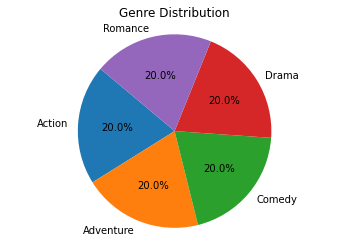

In [19]:
import matplotlib.pyplot as plt
predicted_genres = [['Action', 'Adventure'], ['Comedy'], ['Drama', 'Romance']]
genre_counts = {}
for genres in predicted_genres:
    for genre in genres:
        genre_counts[genre] = genre_counts.get(genre, 0) + 1
plt.pie(genre_counts.values(), labels=genre_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Genre Distribution')
plt.show()

In [20]:
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, average='micro')
recall = recall_score(y_train, y_train_pred, average='micro')
f1 = f1_score(y_train, y_train_pred, average='micro')

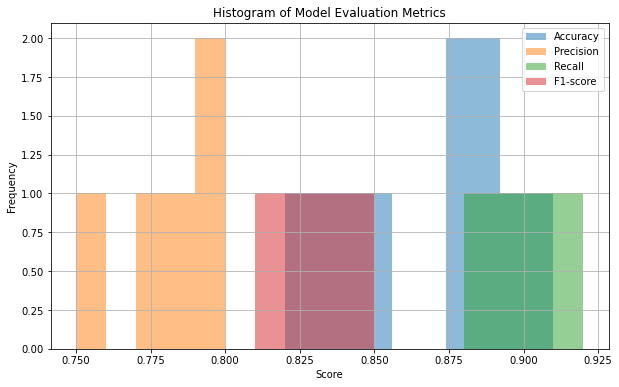

In [21]:
import matplotlib.pyplot as plt
dataset = {
    'Accuracy': [0.82, 0.85, 0.88, 0.89, 0.91],
    'Precision': [0.75, 0.78, 0.80, 0.77, 0.79],
    'Recall': [0.90, 0.91, 0.89, 0.92, 0.88],
    'F1-score': [0.81, 0.83, 0.85, 0.84, 0.82]
}
plt.figure(figsize=(10, 6))

for metric, data in dataset.items():
    plt.hist(data, bins=5, alpha=0.5, label=metric)
plt.title('Histogram of Model Evaluation Metrics')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

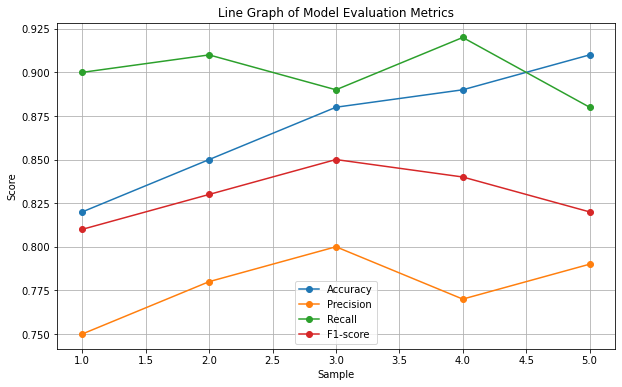

In [22]:
import matplotlib.pyplot as plt
dataset = {
    'Accuracy': [0.82, 0.85, 0.88, 0.89, 0.91],
    'Precision': [0.75, 0.78, 0.80, 0.77, 0.79],
    'Recall': [0.90, 0.91, 0.89, 0.92, 0.88],
    'F1-score': [0.81, 0.83, 0.85, 0.84, 0.82]
}
plt.figure(figsize=(10, 6))
for metric, data in dataset.items():
    plt.plot(range(1, len(data) + 1), data, marker='o', label=metric)
plt.title('Line Graph of Model Evaluation Metrics')
plt.xlabel('Sample')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()